In [36]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
data = pd.read_csv('ceneval_mentor_v3.csv')
data.head()

,Unnamed: 0,TIPO_EXA,ANO_NAC,SEXO,LENG_MA,LENG_PA,PLT_PROC,RAZ_RAPT,RAZ_RACT,RAZ_OPT,...,SER_TVP,SER_TABL,CUARTOS,SER_PC,SER_TV,SER_AUTO,SER_BANO,VAC_RM,DICTAMEN,VECES_EXAM
0,0,0.0077,0.90625,0,0.0,0.0,0.0355,0.0,1.0,1.0,...,1.0,1.0,0.22,1.0,1.0,1.0,1.0,0.0,0,1.0
1,1,0.0705,1.00000,1,0.0,0.0,0.0900,1.0,0.0,0.0,...,0.0,0.0,0.22,1.0,1.0,1.0,1.0,1.0,0,1.0
2,2,0.0705,0.90625,0,0.0,0.0,0.0900,1.0,1.0,1.0,...,0.0,0.0,0.41,0.0,1.0,0.0,1.0,0.0,1,1.0
3,3,0.0705,1.00000,1,0.0,0.0,0.0900,1.0,1.0,1.0,...,1.0,1.0,0.41,1.0,1.0,0.0,1.0,1.0,1,1.0
4,4,0.0705,0.84375,0,0.0,0.0,0.0900,1.0,1.0,1.0,...,0.0,0.0,0.22,1.0,1.0,0.0,1.0,0.0,1,1.0


In [38]:
data.columns.str.match('Unnamed')
data_cl=data.loc[:, ~data.columns.str.match('Unnamed')]
data_cl


,TIPO_EXA,ANO_NAC,SEXO,LENG_MA,LENG_PA,PLT_PROC,RAZ_RAPT,RAZ_RACT,RAZ_OPT,RAZ_PCUM,...,SER_TVP,SER_TABL,CUARTOS,SER_PC,SER_TV,SER_AUTO,SER_BANO,VAC_RM,DICTAMEN,VECES_EXAM
0,0.0077,0.90625,0,0.0,0.0,0.0355,0.0,1.0,1.0,0.0,...,1.0,1.0,0.22,1.0,1.0,1.0,1.0,0.0,0,1.0
1,0.0705,1.00000,1,0.0,0.0,0.0900,1.0,0.0,0.0,0.0,...,0.0,0.0,0.22,1.0,1.0,1.0,1.0,1.0,0,1.0
2,0.0705,0.90625,0,0.0,0.0,0.0900,1.0,1.0,1.0,0.0,...,0.0,0.0,0.41,0.0,1.0,0.0,1.0,0.0,1,1.0
3,0.0705,1.00000,1,0.0,0.0,0.0900,1.0,1.0,1.0,1.0,...,1.0,1.0,0.41,1.0,1.0,0.0,1.0,1.0,1,1.0
4,0.0705,0.84375,0,0.0,0.0,0.0900,1.0,1.0,1.0,0.0,...,0.0,0.0,0.22,1.0,1.0,0.0,1.0,0.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,0.0303,1.00000,1,0.0,0.0,0.0434,0.0,1.0,1.0,0.0,...,1.0,0.0,0.41,0.0,1.0,1.0,1.0,1.0,1,1.0
15609,0.0705,1.00000,1,0.0,0.0,0.0900,0.0,1.0,1.0,0.0,...,0.0,0.0,0.22,0.0,1.0,1.0,1.0,1.0,0,1.0
15610,0.0705,1.00000,1,0.0,0.0,0.0900,1.0,1.0,1.0,0.0,...,1.0,0.0,0.41,1.0,1.0,1.0,1.0,1.0,1,1.0
15611,0.0705,1.00000,1,0.0,0.0,0.0900,0.0,0.0,1.0,1.0,...,1.0,0.0,0.22,1.0,1.0,1.0,1.0,1.0,0,1.0


In [39]:
x=data_cl.drop(["DICTAMEN"], axis=1).values  
y=data_cl['DICTAMEN']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf=RandomForestClassifier(n_estimators=604,max_features=0.95,max_depth=46,criterion='gini', n_jobs=-1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7094363791631084


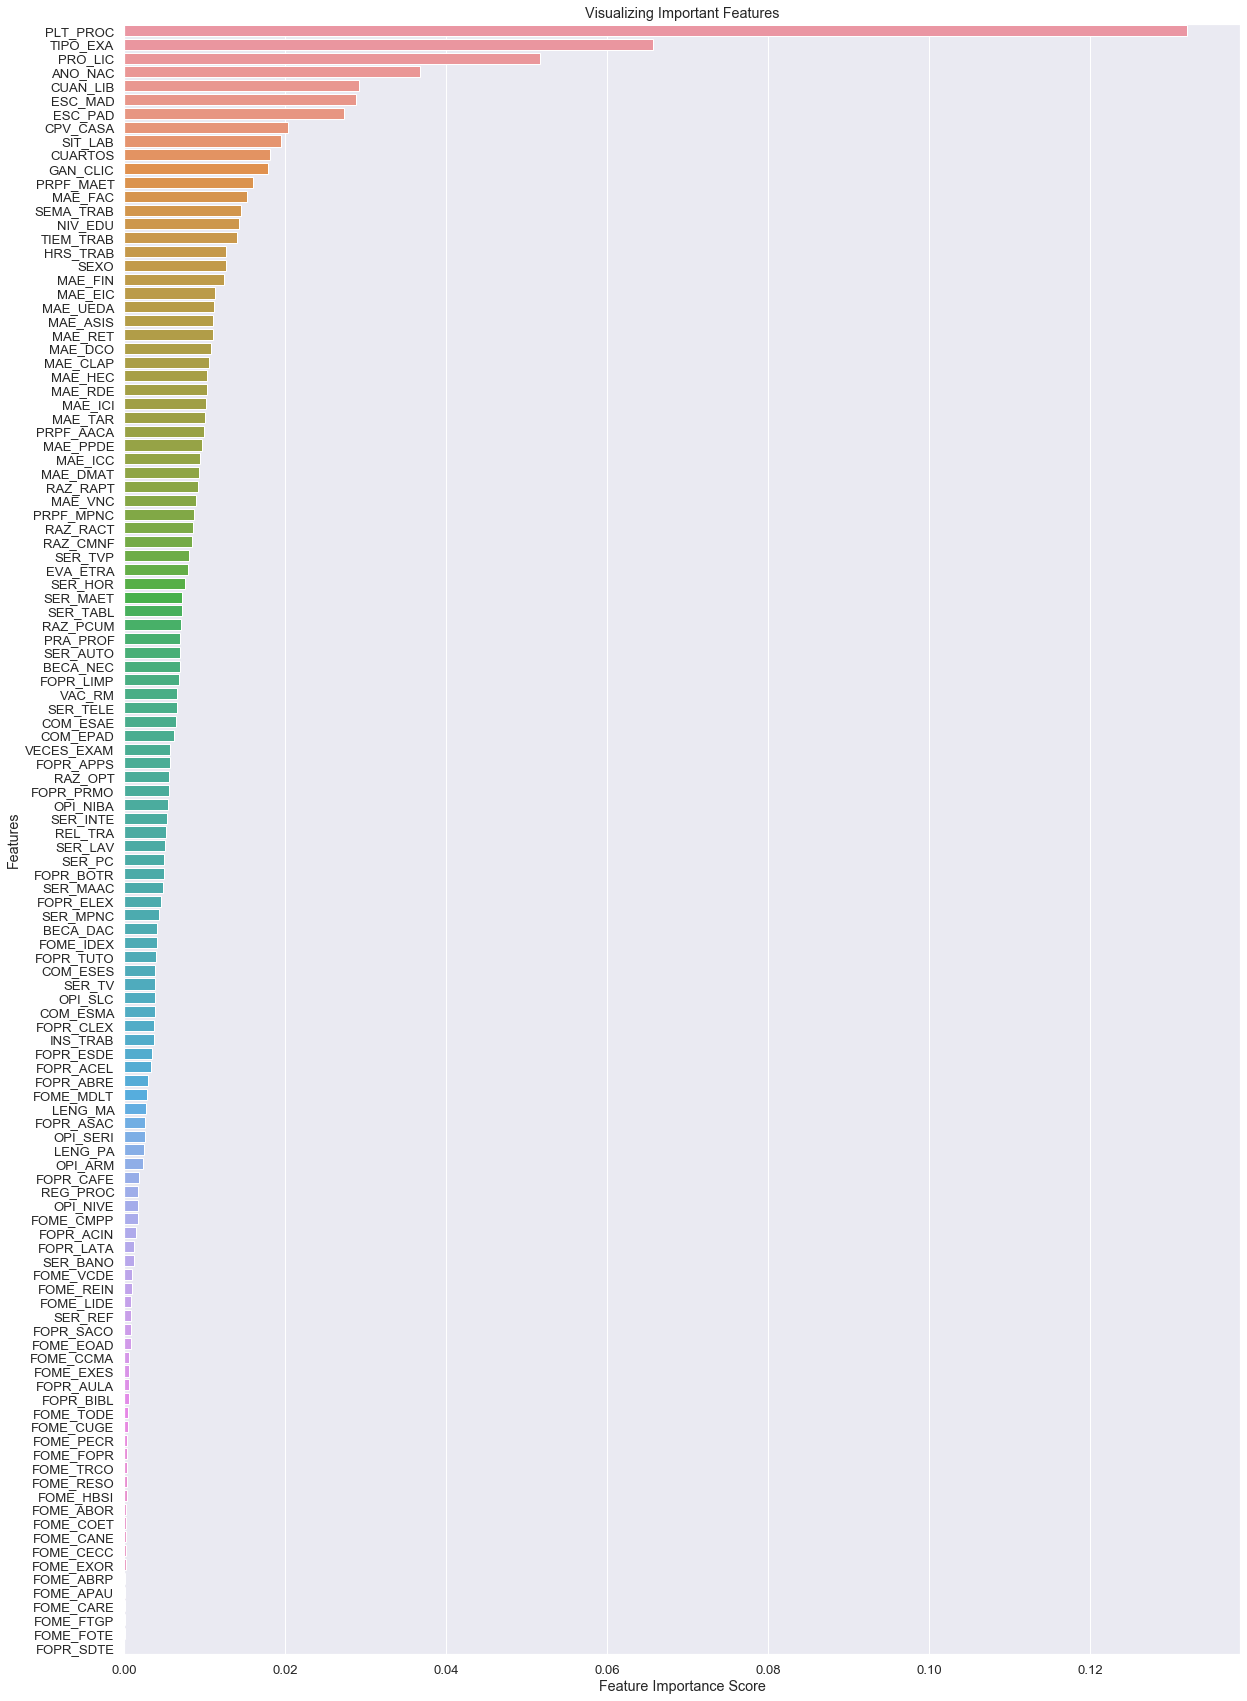

In [40]:
feature_imp = pd.Series(clf.feature_importances_,index=data_cl.drop(["DICTAMEN"], axis=1).columns).sort_values(ascending=False)

plt.figure(figsize=(20,30))
sb.set(font_scale=1.2)

sb.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [41]:
clf=RandomForestClassifier(n_estimators=973,max_features=0.65,max_depth=87,criterion='gini', n_jobs=-1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7062339880444065


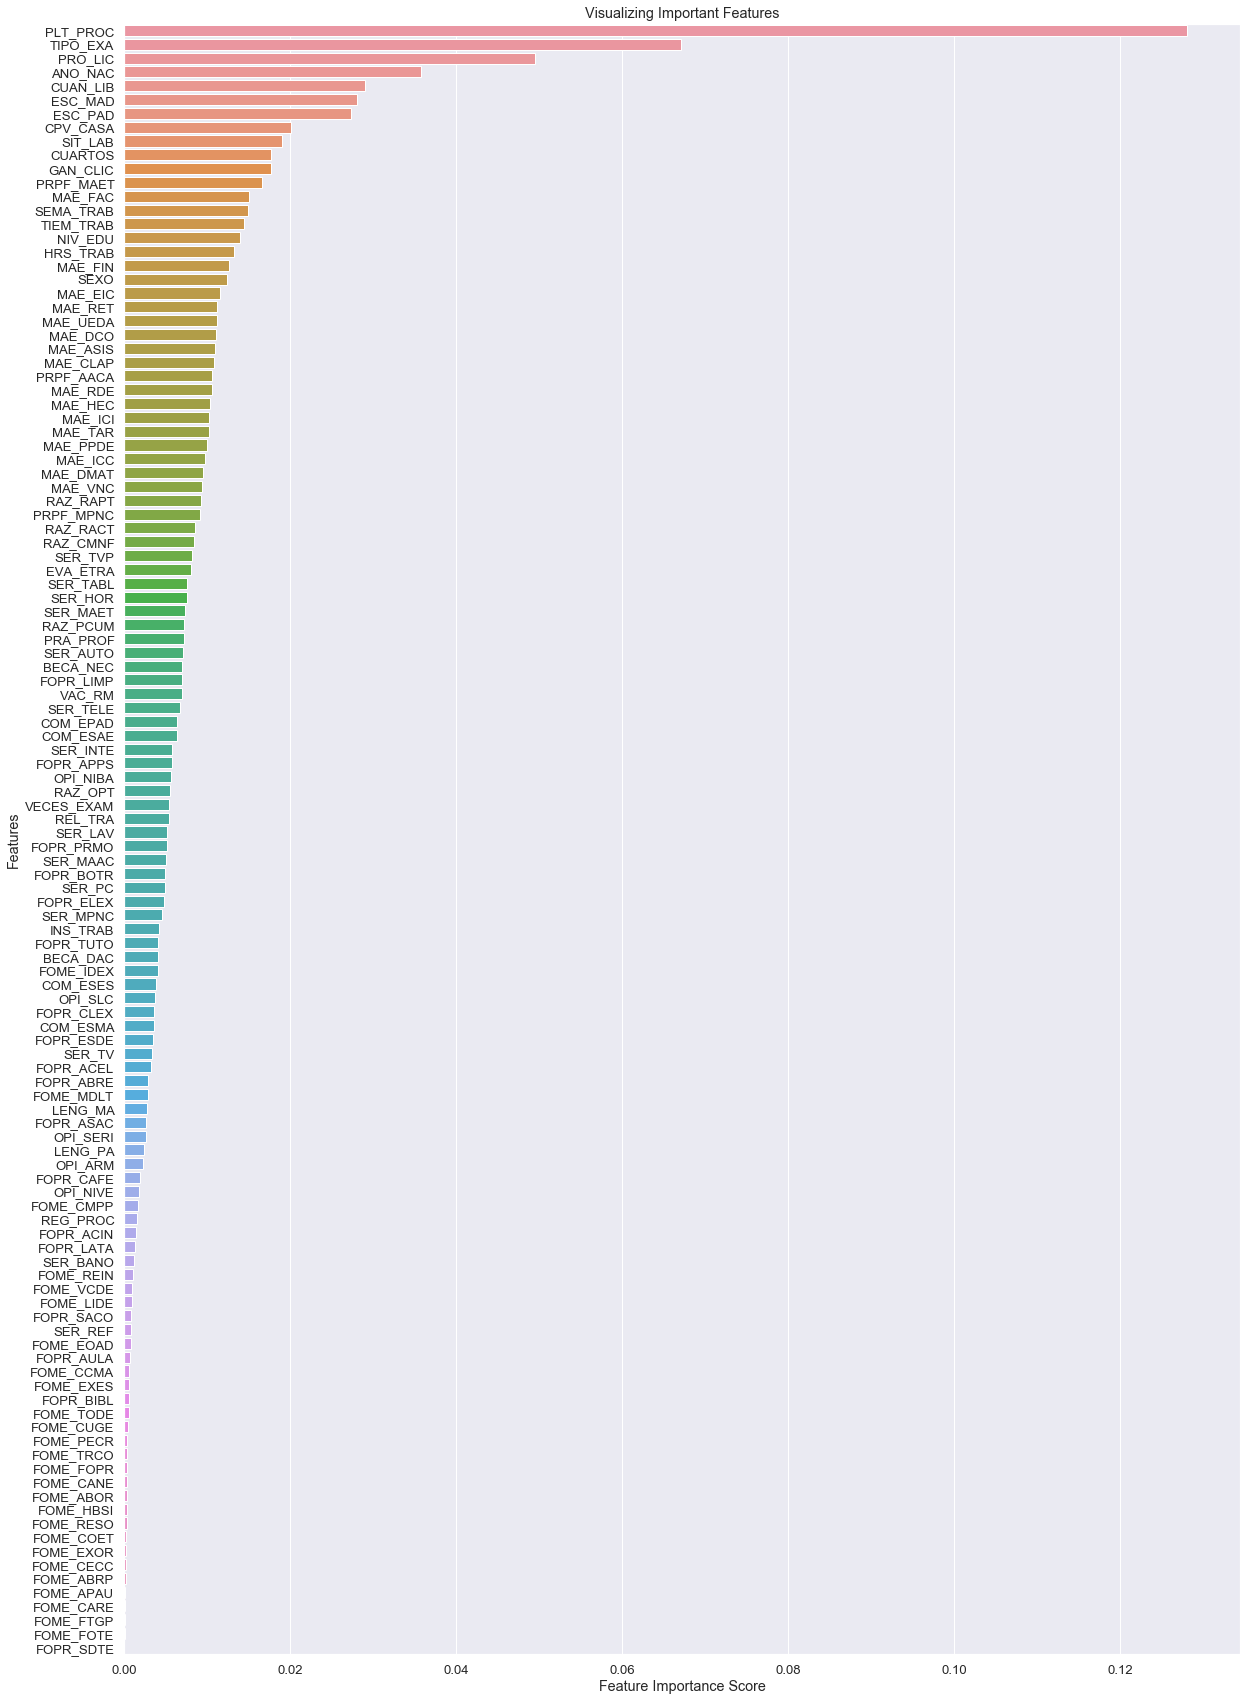

In [42]:
feature_imp = pd.Series(clf.feature_importances_,index=data_cl.drop(["DICTAMEN"], axis=1).columns).sort_values(ascending=False)

plt.figure(figsize=(20,30))
sb.set(font_scale=1.2)

sb.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Accuracy: 0.7051665243381725


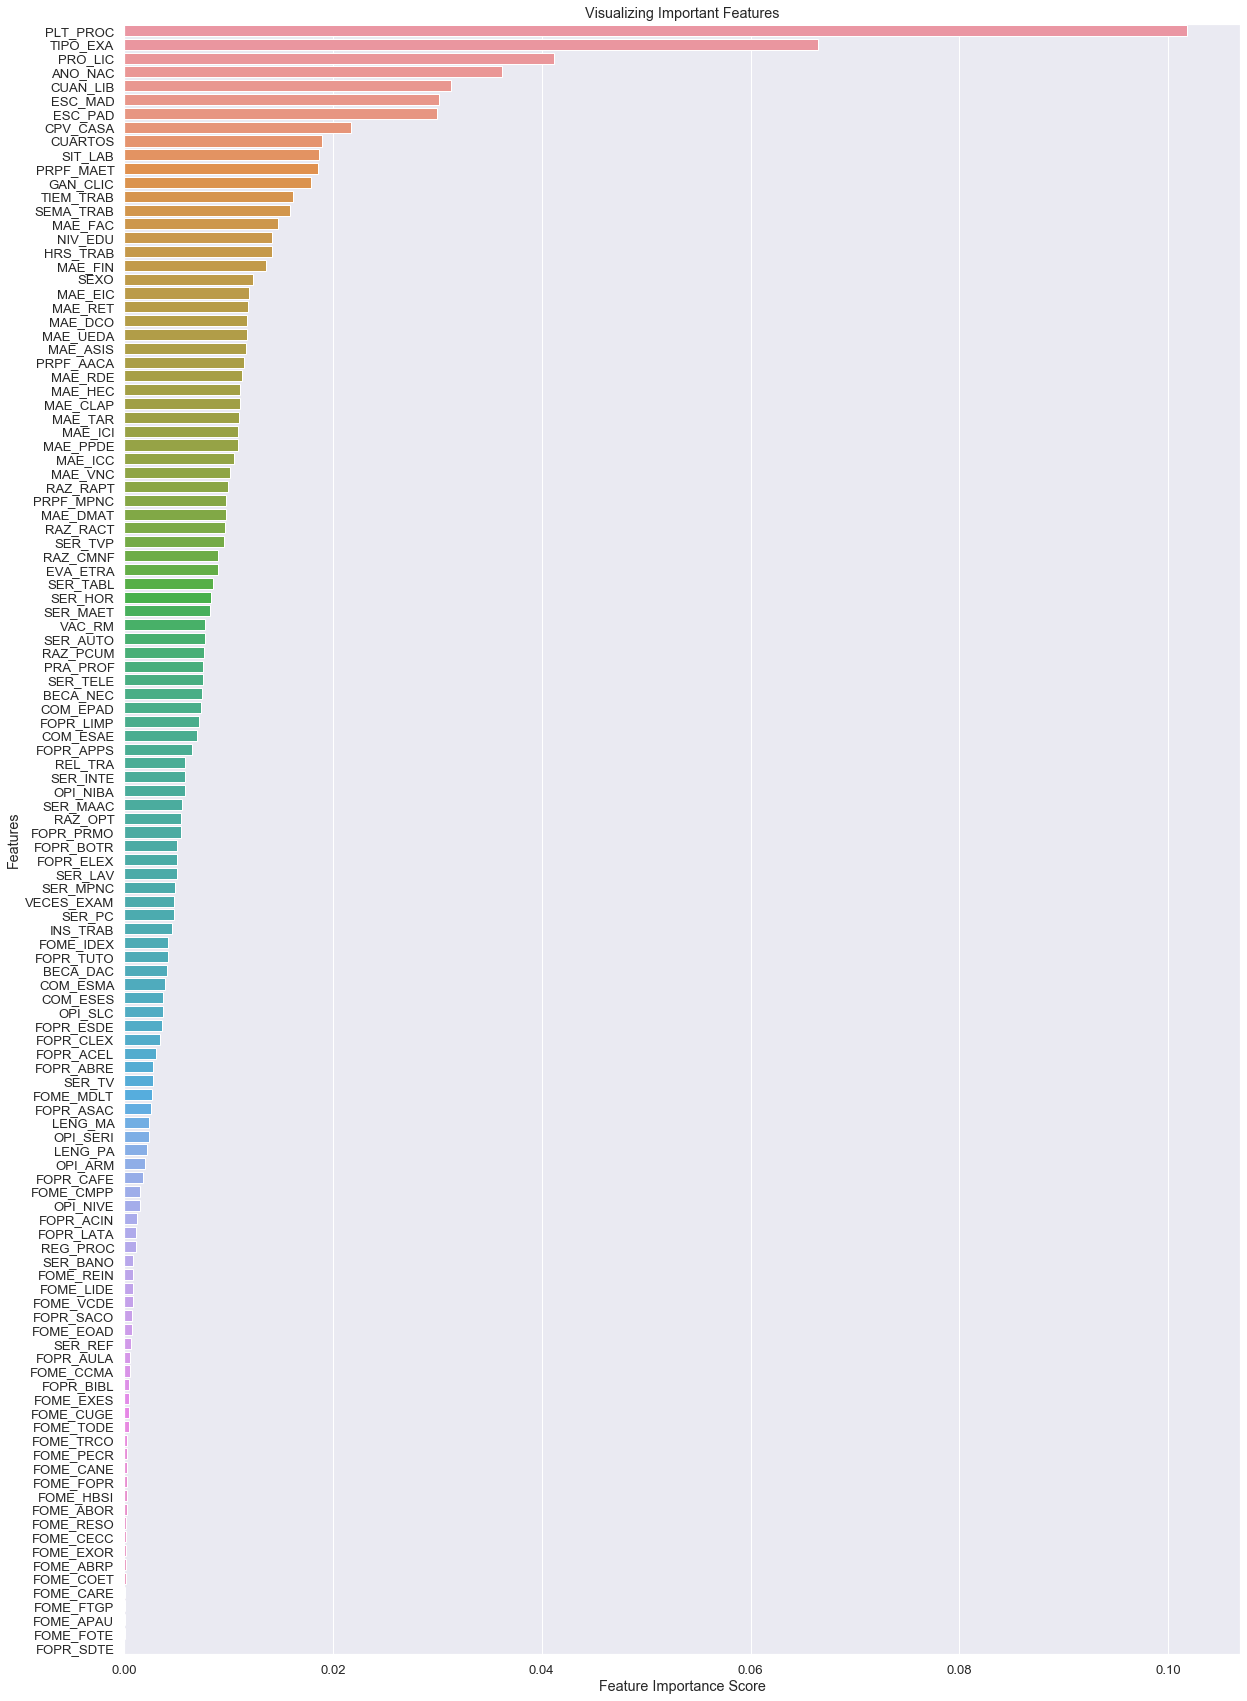

In [43]:
clf=RandomForestClassifier(n_estimators=961,max_features=0.60,max_depth=81,criterion='entropy', n_jobs=-1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=data_cl.drop(["DICTAMEN"], axis=1).columns).sort_values(ascending=False)

plt.figure(figsize=(20,30))
sb.set(font_scale=1.2)

sb.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
